# Part 2: Exploratory data analysis

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

<h3>Imports, links, and loading</h3>

In [1]:
# import Library

import pandas as pd
import numpy as np 

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset

df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df.shape

(22699, 18)

<h3> Data Exploration</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
# change datetime columns datatype

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

 <h3>Data visualization</h3>

**1. Boxplots:** helpful to determine outliers and where the bulk of the data points reside 

Text(0.5, 1.0, 'trip_distance histogram')

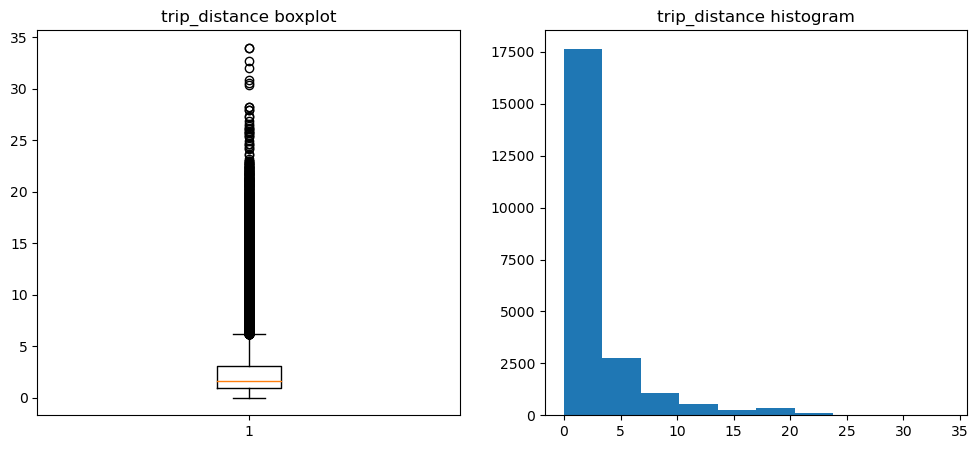

In [5]:
#Visualise outliers in trip_distance

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].boxplot(df['trip_distance'])
axs[0].set_title("trip_distance boxplot")

axs[1].hist(df['trip_distance'])
axs[1].set_title("trip_distance histogram")

*Note:* Majority of the trip distance in the range of 0 to 20 miles

Text(0.5, 1.0, 'histogram for total_amount')

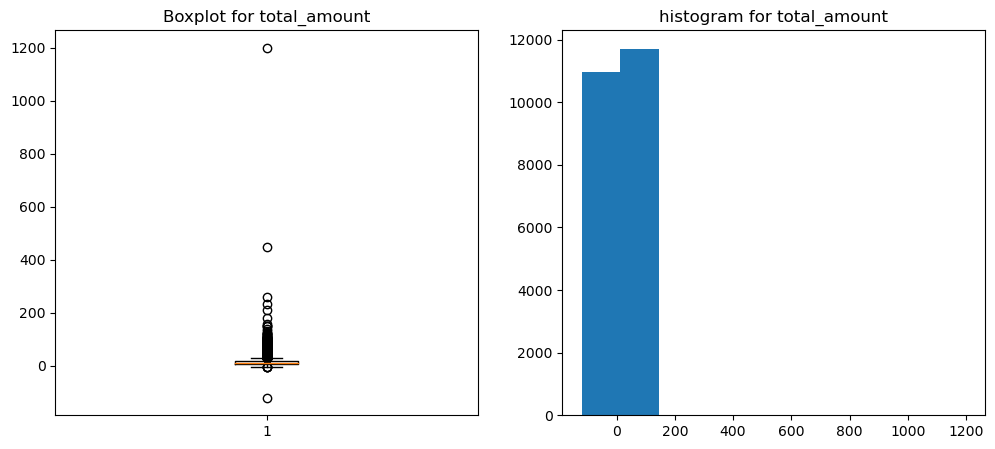

In [6]:
#visualise outlier for total_amount

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].boxplot(df['total_amount'])
axs[0].set_title("Boxplot for total_amount")

axs[1].hist(df['total_amount'])
axs[1].set_title("histogram for total_amount")


*Note:* There are a few outliers in total amount (min is -ve)

Text(0.5, 1.0, 'histogram for tip_amount')

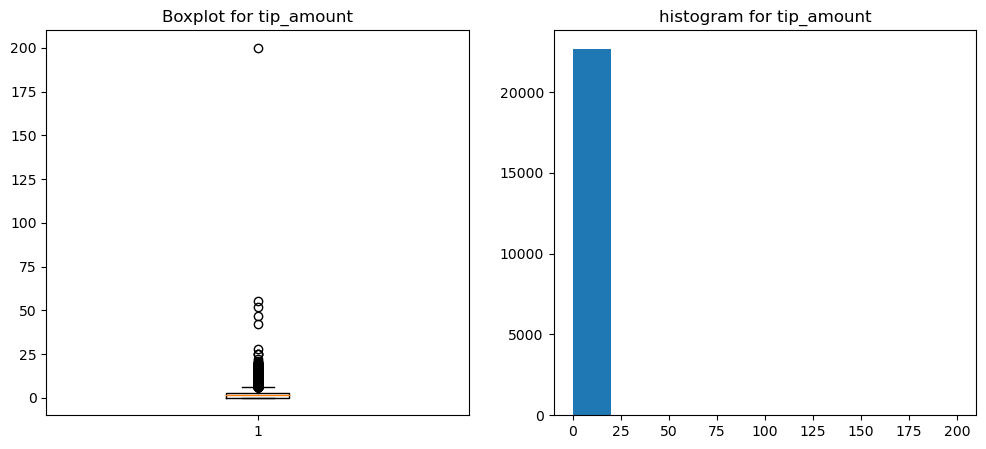

In [7]:
#visualise outlier for tip_amount

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].boxplot(df['tip_amount'])
axs[0].set_title("Boxplot for tip_amount")

axs[1].hist(df['tip_amount'])
axs[1].set_title("histogram for tip_amount")

*Note:* Majority of the tip_amount in the range of 0 to 25 dollars

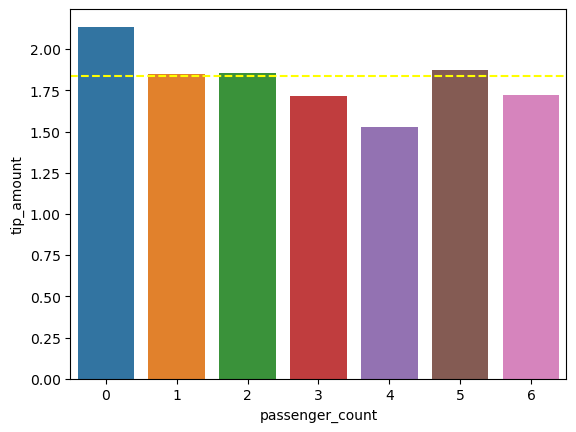

In [8]:
# tip per passangers

df_tip = df.groupby('passenger_count')[['tip_amount']].mean()

# visualise

fig = sns.barplot(x = df_tip.index, y= 'tip_amount', data = df_tip)
fig.axhline(df['tip_amount'].mean(), ls= '--', color = 'yellow', label = "Mean")

In [22]:
df.groupby('passenger_count').size()

passenger_count
0       33
1    16117
2     3305
3      953
4      455
5     1143
6      693
dtype: int64

*Note:* Passanger count 0, there is highest tip_amount.

In [9]:
#date graphs

df['trip_month'] = df['tpep_pickup_datetime'].dt.month_name().str.slice(stop = 3)
df['trip_weekday'] = df['tpep_pickup_datetime'].dt.day_name().str.slice(stop = 3)

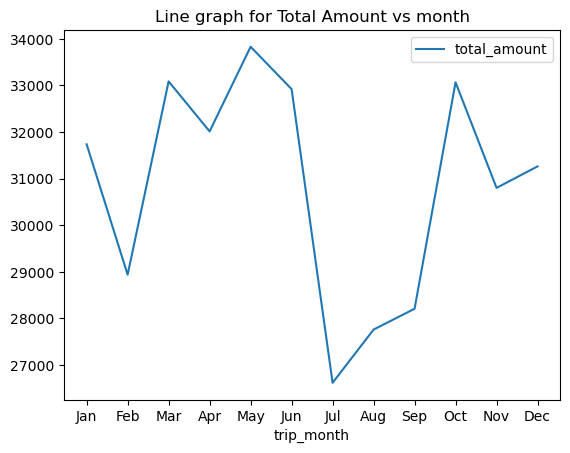

In [10]:
#month vs total_amount
month_sort = ['Jan' , 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_month = df.groupby('trip_month')[['total_amount']].sum().reindex(index = month_sort)

sns.lineplot(df_month)
plt.title('Line graph for Total Amount vs month')
plt.show()

*Note:* Total_amount for Jul month is significantly smaller

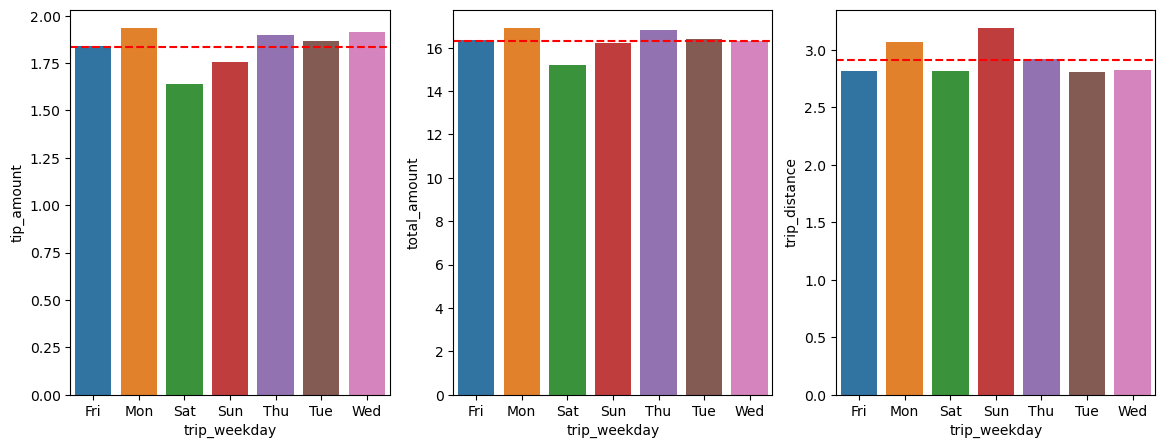

In [11]:
# weekdays vs tip_amount, total_amount, trip_distance

df_week = df.groupby('trip_weekday')[['tip_amount', 'total_amount', 'trip_distance']].mean()

fig, axn = plt.subplots(1, 3, figsize = (14,5))

fig1 = sns.barplot(x = df_week.index, y = df_week['tip_amount'], ax = axn[0])
fig1.axhline(df['tip_amount'].mean(), ls='--', color= 'red')

fig2 =sns.barplot(x = df_week.index, y = df_week['total_amount'], ax = axn[1])
fig2.axhline(df['total_amount'].mean(), ls='--', color= 'red')

fig3 = sns.barplot(x = df_week.index, y = df_week['trip_distance'], ax = axn[2])
fig3.axhline(df['trip_distance'].mean(), ls='--', color= 'red')
plt.show()

*Note:* Trip distance, total_amount and tip amount is equally distributed in weekdays

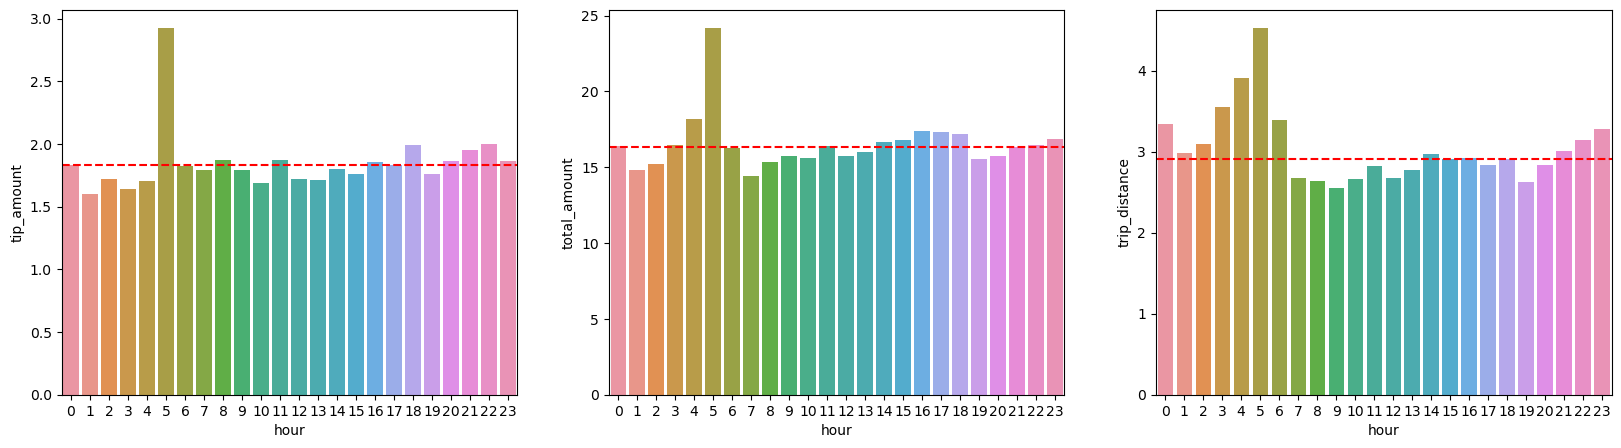

In [12]:
# check hours-vs tip_amount, total_amount, trip_distance
df['hour'] = df['tpep_pickup_datetime'].dt.hour

df_week = df.groupby('hour')[['tip_amount', 'total_amount', 'trip_distance']].mean()

fig, axn = plt.subplots(1, 3, figsize = (20,5))

fig1 = sns.barplot(x = df_week.index, y = df_week['tip_amount'], ax = axn[0])
fig1.axhline(df['tip_amount'].mean(), ls='--', color= 'red')

fig2 =sns.barplot(x = df_week.index, y = df_week['total_amount'], ax = axn[1])
fig2.axhline(df['total_amount'].mean(), ls='--', color= 'red')

fig3 = sns.barplot(x = df_week.index, y = df_week['trip_distance'], ax = axn[2])
fig3.axhline(df['trip_distance'].mean(), ls='--', color= 'red')
plt.show()

*Note:*Trip distance, total_amount and tip amount is unequally distributed in hours. More travelling during rush_hrs

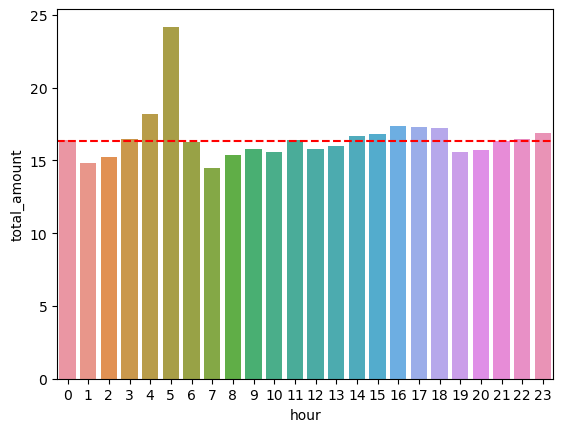

In [13]:
# rush_hours - not weekends-- 3 to 6 & 11, 14 to 18, 21 to 23
df_ = df[['hour', 'trip_weekday','total_amount']]
df_.loc[df_['trip_weekday'] =='Sat', 'total_amount'] = 0
df_.loc[df_['trip_weekday'] =='Sun', 'total_amount'] = 0

df_week = df.groupby('hour')[['tip_amount', 'total_amount', 'trip_distance']].mean()

fig1 = sns.barplot(x = df_week.index, y = df_week['total_amount'])
fig1.axhline(df['total_amount'].mean(), ls='--', color= 'red')


*Note:* total_amount is equally distributed in rush hours

In [14]:
#duration

<Axes: xlabel='DOLocationID', ylabel='Count'>

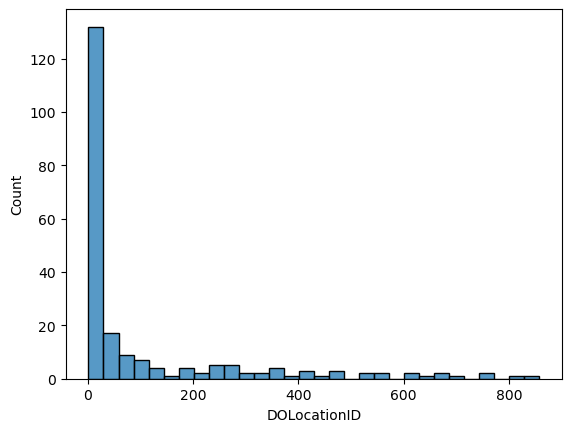

In [15]:
# DOLocation counts
df_DOLocation = df['DOLocationID'].value_counts()
sns.histplot(df_DOLocation)

<Axes: xlabel='DOLocationID', ylabel='Count'>

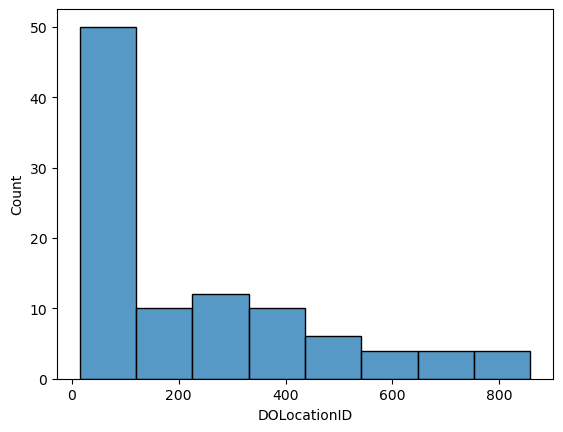

In [16]:
# DOLocationID top 100

df_DOLocation = df['DOLocationID'].value_counts().head(100)

sns.histplot(df_DOLocation)

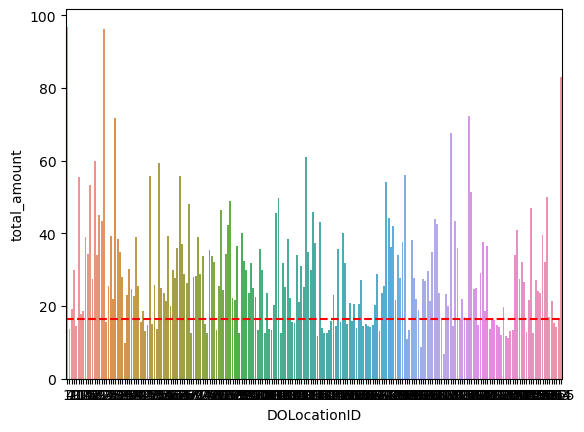

In [17]:
# DOlocation vs mean total_amount

df_DOLocation2 = df.groupby('DOLocationID')[['total_amount']].mean()
fig = sns.barplot(x = df_DOLocation2.index , y= df_DOLocation2['total_amount'])

fig.axhline(df['total_amount'].mean(), ls= '--', color = 'red')

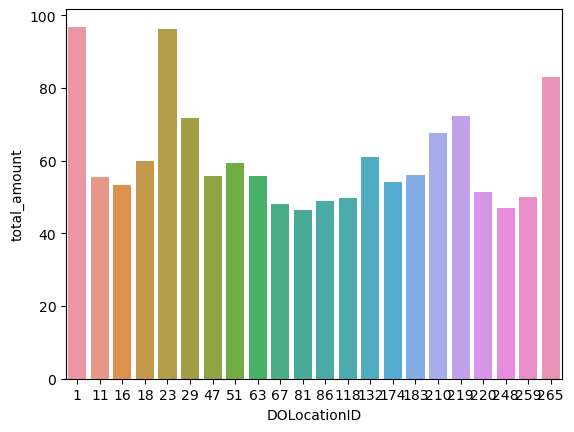

In [21]:
# get DOLocationID about90 percentile total_amount

df_DOLocation3 = df_DOLocation2[df_DOLocation2['total_amount'] >= df_DOLocation2['total_amount'].quantile(0.90)]
fig = sns.barplot(x = df_DOLocation3.index , y= df_DOLocation3['total_amount'])


*Note:* total_amount for a few Drop off location is greater then the others.

<h3> Evaluate and share results</h3>

**Questions based on Analysis-**
1. Why is total_amount more for a few drop off location?
2. Why is total_amount lower in the months of Jul and Aug?
3. Why did passanger give tip if he/she didn't took the ride?
4. Why is the minimun total_amount negative?